In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import re
import matplotlib.pyplot as plt
          
import operator

In [4]:
import numpy as np

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
credits =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\credits.csv")

In [7]:
keywords =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\keywords.csv")

In [8]:
links =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\links.csv")

In [9]:
links_small =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\links_small.csv")

In [13]:
movies =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\movies_metadata.csv")

In [11]:
ratings =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\ratings.csv")

In [12]:
ratings_small =pd.read_csv(r"C:\Users\spark2\Desktop\Me\York\M3_DataMining\Summative\Movie_Data\ratings_small.csv")

In [47]:
credits.head(10)

,cast,crew,id,director
0,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston
2,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch
3,"Whitney Houston, Angela Bassett, Loretta Devin...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker
4,"Steve Martin, Diane Keaton, Martin Short, Kimb...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer
5,"Al Pacino, Robert De Niro, Val Kilmer, Jon Voi...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949,Michael Mann
6,"Harrison Ford, Julia Ormond, Greg Kinnear, Ang...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860,Sydney Pollack
7,"Jonathan Taylor Thomas, Brad Renfro, Rachael L...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325,Peter Hewitt
8,"Jean-Claude Van Damme, Powers Boothe, Dorian H...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091,Peter Hyams
9,"Pierce Brosnan, Sean Bean, Izabella Scorupco, ...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710,Martin Campbell


In [46]:
# cleaning credits
cast_regex = re.compile(r"'name': '(.*?)'")
director_regex = re.compile(r"'Director', 'name': '(.*?)'")
credits['cast'] = credits['cast'].apply(lambda x: ', '.join(cast_regex.findall(x)))
credits['director'] = credits['crew'].apply(lambda x: ', '.join(director_regex.findall(x)))

In [48]:
# List of directors without ''
cond = credits.director == ''
directors = credits.loc[~cond, ['id', 'director']] #List of directors without ''

In [13]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [14]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


In [15]:
links_small

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [29]:
movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [22]:
movies.shape

(45466, 24)

In [30]:
# Extract data from JSONified object
regex = re.compile(r": '(.*?)'")
movies['genres'] = movies['genres'].apply(lambda x: ', '.join(regex.findall(x)))

In [31]:
print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 3
Number of missing values in spoken_languages column: 6


In [32]:
movies.dropna(subset=['production_companies'], axis='rows', inplace=True)
movies.dropna(subset=['spoken_languages'], axis='rows', inplace=True)

print('Number of missing values in production_companies column: {}'.format(movies['production_companies'].isna().sum()))
print('Number of missing values in spoken_languages column: {}'.format(movies['spoken_languages'].isna().sum()))

Number of missing values in production_companies column: 0
Number of missing values in spoken_languages column: 0


In [33]:
movies['production_companies'] = movies['production_companies'].apply(lambda x: ', '.join(regex.findall(x)))
movies['production_countries'] = movies['production_countries'].apply(lambda x: ', '.join(regex.findall(x)))
movies['spoken_languages'] = movies['spoken_languages'].apply(lambda x: ', '.join(regex.findall(x)))

In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45460 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45460 non-null object
belongs_to_collection    4490 non-null object
budget                   45460 non-null object
genres                   45460 non-null object
homepage                 7778 non-null object
id                       45460 non-null object
imdb_id                  45443 non-null object
original_language        45449 non-null object
original_title           45460 non-null object
overview                 44506 non-null object
popularity               45460 non-null object
poster_path              45077 non-null object
production_companies     45460 non-null object
production_countries     45460 non-null object
release_date             45376 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [34]:
# Changing columns to the right dtypes
movies['budget'] = movies['budget'].astype(float)
movies['popularity'] = movies['popularity'].astype(float)
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y/%m/%d', errors='coerce')
movies['runtime'] = pd.to_timedelta(movies['runtime'], unit='m')

In [35]:
# Remove duplicates
cond = movies['imdb_id'].duplicated(keep=False)
movies.loc[cond, ['imdb_id','title','release_date', 'overview']].sort_values('imdb_id').head(10)

,imdb_id,title,release_date,overview
38871,tt0022537,The Viking,1931-06-21,"Originally called White Thunder, American prod..."
16167,tt0022537,The Viking,1931-06-21,"Originally called White Thunder, American prod..."
949,tt0022879,A Farewell to Arms,1932-12-08,British nurse Catherine Barkley (Helen Hayes) ...
15074,tt0022879,A Farewell to Arms,1932-12-08,British nurse Catherine Barkley (Helen Hayes) ...
838,tt0046468,Wife,1953-04-29,"Ten years into a marriage, the wife is disappo..."
30001,tt0046468,Wife,1953-04-29,"Ten years into a marriage, the wife is disappo..."
7345,tt0062229,Le Samouraï,1967-10-25,Hitman Jef Costello is a perfectionist who alw...
9165,tt0062229,Le Samouraï,1967-10-25,Hitman Jef Costello is a perfectionist who alw...
29374,tt0067306,King Lear,1971-02-04,"King Lear, old and tired, divides his kingdom ..."
15702,tt0067306,King Lear,1971-02-04,"King Lear, old and tired, divides his kingdom ..."


In [36]:
print('Number of duplicate imdb_ids before drop: {}'.format(movies['imdb_id'].duplicated().sum()))
movies.drop_duplicates('imdb_id', inplace=True)
print('Number of duplicate imdb_ids remaining: {}'.format(movies['imdb_id'].duplicated().sum()))

Number of duplicate imdb_ids before drop: 46
Number of duplicate imdb_ids remaining: 0


In [37]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.541400e+04,45414.000000,4.541400e+04,45159,45414.000000,45414.000000
mean,4.226261e+06,2.921932,1.121683e+07,0 days 01:34:07.927987,5.618864,109.971837
std,1.743143e+07,6.007588,6.436312e+07,0 days 00:38:24.472460,1.923210,491.549122
min,0.000000e+00,0.000000,0.000000e+00,0 days 00:00:00,0.000000,0.000000
25%,0.000000e+00,0.386107,0.000000e+00,0 days 01:25:00,5.000000,3.000000
50%,0.000000e+00,1.127685,0.000000e+00,0 days 01:35:00,6.000000,10.000000
75%,0.000000e+00,3.679143,0.000000e+00,0 days 01:47:00,6.800000,34.000000
max,3.800000e+08,547.488298,2.787965e+09,0 days 20:56:00,10.000000,14075.000000


In [24]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,45414,4.22626e+06,1.74314e+07,0,0,0,0,3.8e+08
popularity,45414,2.92193,6.00759,0,0.386107,1.12769,3.67914,547.488
revenue,45414,1.12168e+07,6.43631e+07,0,0,0,0,2.78797e+09
runtime,45159,0 days 01:34:07.927987,0 days 00:38:24.472460,0 days 00:00:00,0 days 01:25:00,0 days 01:35:00,0 days 01:47:00,0 days 20:56:00
vote_average,45414,5.61886,1.92321,0,5,6,6.8,10
vote_count,45414,109.972,491.549,0,3,10,34,14075


ValueError: cannot convert float NaN to integer

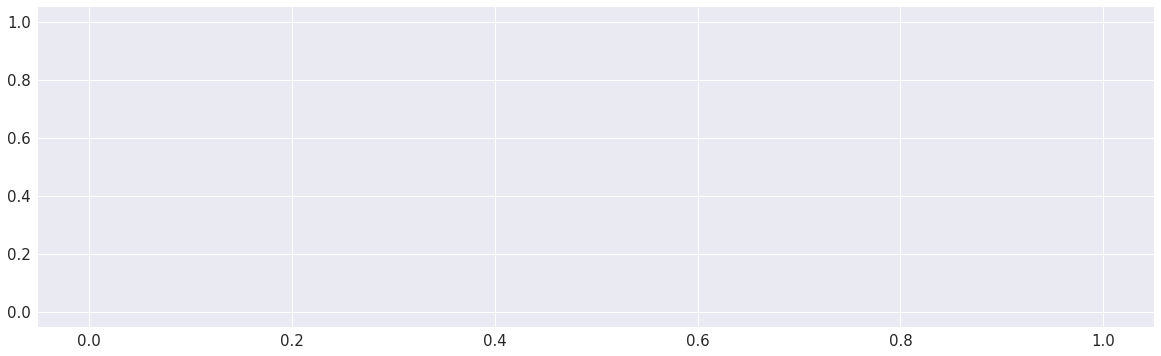

In [44]:
runtime_int = movies['runtime']/np.timedelta64(1, 'm')

with plt.style.context('seaborn'):
    fig = plt.figure(figsize=(20,20));
    grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.2);
    plt.rc(('xtick', 'ytick'), labelsize=15); plt.rc('axes', labelsize=15); plt.rcParams["patch.force_edgecolor"] = True;
    _ = plt.subplot(grid[0, 0:]); _ = sns.distplot(runtime_int, kde=False, axlabel='Runtime in Minutes');
    _ = plt.subplot(grid[1,0]); _ = sns.distplot(movies['budget'], kde=False, axlabel='Budget in USD Millions');
    _ = plt.subplot(grid[1,1]); _ = sns.distplot(movies['revenue'], kde=False, axlabel='Revenue in USD Billions');
    _ = plt.subplot(grid[2,0]); _ = sns.distplot(movies['vote_average'], kde=False, axlabel='Vote Average');
    _ = plt.subplot(grid[2,1]); _ = sns.distplot(movies['vote_count'], kde=False, axlabel='Vote Count');

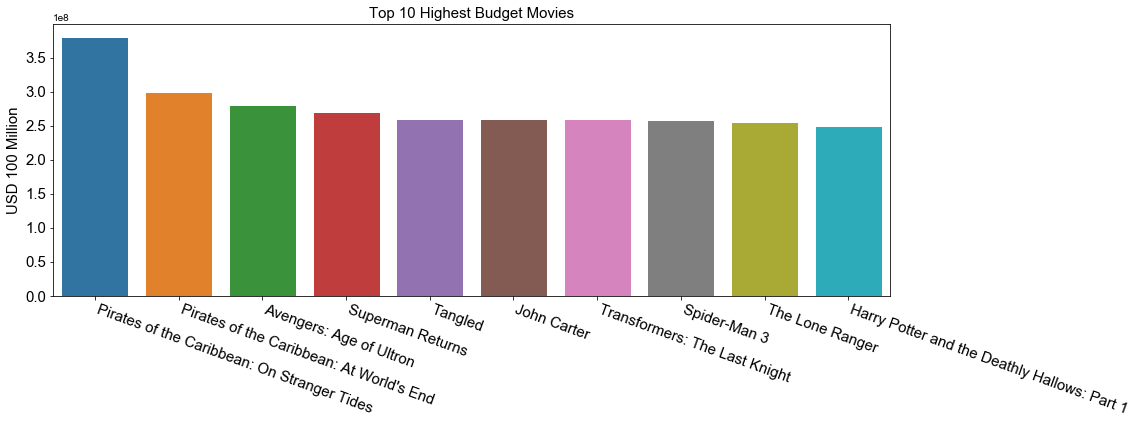

In [45]:
cols = ['title', 'budget']
budget_df = movies.sort_values('budget', ascending=False)[cols].set_index('title')
top_10_budget = budget_df.head(10)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('dark')
sns.barplot(data=top_10_budget, x=top_10_budget.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD 100 Million', fontsize=15);
plt.title('Top 10 Highest Budget Movies', fontsize=15);

In [50]:
movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"Animation, Comedy, Family",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,Pixar Animation Studios,"US, United States of America",1995-10-30,373554033.0,01:21:00,"en, English",Released,NaN,Toy Story,False,7.7,5415.0


In [53]:
directors.head(1)

,id,director
0,862,John Lasseter


In [57]:
genres.head(1)

,id,genres
0,862,"Animation, Comedy, Family"


In [56]:
# Movie genres without ''
cond2 = movies.genres == ''
genres = movies.loc[~cond2, ['id', 'genres']] #Movie genres without ''
genres['id'] = genres['id'].astype(int) #Changing id to from obj to int for merging

In [58]:
# Merging director and genres
director_genre = pd.merge(genres, directors, on='id') #Merging
director_genre.head(5)

,id,genres,director
0,862,"Animation, Comedy, Family",John Lasseter
1,8844,"Adventure, Fantasy, Family",Joe Johnston
2,15602,"Romance, Comedy",Howard Deutch
3,31357,"Comedy, Drama, Romance",Forest Whitaker
4,11862,Comedy,Charles Shyer


In [59]:
# Separate each genre into dummy variable
genre_dummies = director_genre.genres.str.get_dummies(sep=', ') #Creating dummy variables for genres from director_genre
director_genre_dummies = director_genre.join(genre_dummies) #Joining director_genre with genre_dummies
director_genre_dummies.head(3)

,id,genres,director,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,862,"Animation, Comedy, Family",John Lasseter,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,8844,"Adventure, Fantasy, Family",Joe Johnston,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,15602,"Romance, Comedy",Howard Deutch,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
genre = movies[['id', 'imdb_id', 'genres']]
genre

,id,imdb_id,genres
0,862,tt0114709,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,tt0113497,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,tt0113228,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,tt0114885,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,tt0113041,"[{'id': 35, 'name': 'Comedy'}]"
...,...,...,...
45461,439050,tt6209470,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,111109,tt2028550,"[{'id': 18, 'name': 'Drama'}]"
45463,67758,tt0303758,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,227506,tt0008536,[]


In [17]:
ratings_small

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [27]:
rating_linked = ratings_small.merge(links_small, how='inner', left_on='movieId', right_on='movieId')

In [29]:
rating_linked.shape

(100004, 6)

In [30]:
rating_linked.head(4)

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,31,2.5,1260759144,112792,9909.0
1,7,31,3.0,851868750,112792,9909.0
2,31,31,4.0,1273541953,112792,9909.0
3,32,31,4.0,834828440,112792,9909.0
